In [22]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import time

In [23]:
from tokenize_data import process

train_directory = '/home/a_stasiuk/bsuir_ml_part2/data/aclImdb/train'
test_directory = '/home/a_stasiuk/bsuir_ml_part2/data/aclImdb/test'


train_vectors, train_labels = process(train_directory, mode='train', format='bag-word')
test_vectors, test_labels = process(test_directory, mode='test', format='bag-word')

  0%|          | 38/12500 [00:00<00:33, 376.11it/s]

/home/a_stasiuk/bsuir_ml_part2/data/aclImdb/train/pos 1


  0%|          | 38/12500 [00:00<00:32, 378.92it/s]

/home/a_stasiuk/bsuir_ml_part2/data/aclImdb/train/neg 0


100%|██████████| 12500/12500 [00:30<00:00, 407.43it/s]


[101, 19465, 106, 4461, 11818, 1110, 1126, 2811, 117, 1150, 1844, 1279, 170, 1959, 1119, 1110, 2700, 1106, 1505, 117, 1196, 1119, 2228, 170, 8268, 119, 11818, 1110, 170, 112, 1363, 4218, 112, 1111, 1142, 1273, 113, 1176, 1119, 1108, 1111, 107, 26010, 3056, 11291, 107, 114, 117, 1105, 1119, 1110, 1136, 1178, 1129, 7174, 12598, 117, 1133, 1119, 3370, 170, 2640, 1106, 1849, 1117, 3077, 1104, 1773, 170, 1959, 1114, 9142, 14931, 1105, 21146, 5997, 2340, 119, 1966, 1175, 1132, 1185, 24512, 1107, 1297, 117, 1111, 2256, 117, 1142, 3114, 1126, 2811, 170, 1632, 3767, 1106, 1505, 1472, 1137, 3527, 2650, 1115, 2484, 1149, 117, 1107, 1546, 1106, 3644, 2033, 17000, 2340, 2624, 119, 1262, 1122, 1538, 1129, 1163, 1115, 17000, 2340, 2624, 1144, 25454, 117, 1137, 2423, 9832, 117, 170, 2418, 1295, 1104, 3176, 11589, 119, 133, 9304, 120, 135, 133, 9304, 120, 135, 1188, 1110, 170, 1822, 118, 4788, 1273, 1115, 117, 6929, 1193, 117, 1108, 1189, 1107, 170, 1159, 8492, 1104, 1178, 1160, 2277, 119, 1135, 1110, 

  0%|          | 45/12500 [00:00<00:27, 444.96it/s]

/home/a_stasiuk/bsuir_ml_part2/data/aclImdb/test/pos 1


  0%|          | 42/12500 [00:00<00:29, 415.77it/s]

/home/a_stasiuk/bsuir_ml_part2/data/aclImdb/test/neg 0


100%|██████████| 12500/12500 [00:30<00:00, 412.03it/s]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 101, 1943, 152, 112, 6466, 1513, 117, 1141, 1104, 1412, 10812, 5681, 117, 1110, 14524, 1112, 170, 9142, 1278, 3283, 1150, 1110, 3256, 1106, 3679, 1685, 3287, 119, 1124, 5636, 170, 1437, 1873, 1105, 4887, 1107, 1567, 119, 1109, 1642, 1110, 1141, 1104, 1567, 1105, 14740, 119, 25993, 5886, 4425, 9807, 4840, 1105, 15750, 117, 1136, 1315, 4734, 170, 9495, 1490, 119, 1192, 1209, 5548, 1142, 1273, 1256, 1463, 1103, 3830, 1547, 1136, 1129, 170, 2816, 1141, 119, 146, 4927, 1122, 119, 

In [24]:
batch_size = 64
train_data = TensorDataset(torch.Tensor(train_vectors), torch.Tensor(train_labels))
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=True)

test_data = TensorDataset(torch.Tensor(test_vectors), torch.Tensor(test_labels))
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size, drop_last=True)

In [25]:
is_cuda = torch.cuda.is_available()

if is_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
device

device(type='cuda')

In [26]:
class GRUNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.2):
        super(GRUNet, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        
    def forward(self, x, h):
        out, h = self.gru(x, h)
        out = self.fc(self.relu(out[:,-1]))
        return out, h
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        return hidden


In [72]:
# Setting common hyperparameters
input_dim = next(iter(train_loader))[0].shape[1]
print(input_dim)
output_dim = 2
hidden_dim=256
n_layers = 5
learn_rate = 0.001

model = GRUNet(input_dim, hidden_dim, output_dim, n_layers)
model.to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)

256


In [77]:
from sklearn.metrics import mean_squared_error

def m_eval(model, val_loader, batch_size, device):
    model.eval()
    
    total = 0
    correct = 0
    for x, label in val_loader:
        x.unsqueeze_(0)
        x = x.permute(1,0,2)
        x = x.to(device).float()
#         print(x.shape)
        h = model.init_hidden(x.shape[0])
        
        out, h = model(x, h)
        out = torch.sigmoid(out)
#         print(out)
#         out = torch.flatten(out)
#         predicted = out.cuda().round()

        total += label.size(0)
    
        predicted = out

#         predicted = torch.round(predicted)
        label = label.to(device)
        
        print(predicted, label)

        correct += (predicted == label).sum()

    accuracy = correct.item()/total
    print(x[0], label[0], predicted[0], out[0])
    print(accuracy)
    return accuracy 
        
    
    
from tqdm import tqdm

def train(model, criterion, optimizer, train_loader, batch_size, device, test_loader, EPOCHS=20):    
    losses = {}
    for epoch in tqdm(range(EPOCHS)):
        model.train()
        h = model.init_hidden(batch_size)
        running_loss = 0
        for x, label in train_loader:
            h = h.data
            optimizer.zero_grad()
            
            x.unsqueeze_(0)
            x = x.permute(1,0,2)
            x = x.to(device).float()
#             print(x.shape)
            
            out, h = model(x, h)
#             out = torch.flatten(out)
            out = torch.sigmoid(out)
            max_value, max_index = torch.max(out, 1)
            out = max_index.tolist()
            
            label = label.to(device).long()
            
#             print(out, label)
#             break
            
            loss = criterion(out, label)
            loss.backward()
            optimizer.step()
            
            running_loss += loss
        losses[epoch] = running_loss/len(train_loader)
    m_eval(model, test_loader, batch_size, device)
            
    return (model, losses)

In [76]:
gru_model, losses = train(model, criterion, optimizer, train_loader, batch_size, device, test_loader, EPOCHS=1)

  0%|          | 0/1 [00:00<?, ?it/s]


AttributeError: 'torch.return_types.max' object has no attribute 'size'

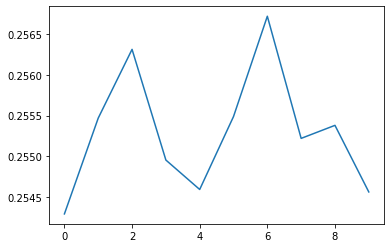

In [56]:
import matplotlib.pyplot as plt

plt.plot(list(losses.keys()), list(losses.values()))
plt.show()